Видео лабораторной: https://youtu.be/r-z1cjvpwBE

TG: https://t.me/data_science_news



---

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MaxAbsScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

2.8.0


# Разведочный анализ данных

[Набор данных Copyright 2020 Google LLC](https://colab.research.google.com/github/google/eng-edu/blob/main/ml/cc/exercises/linear_regression_with_a_real_dataset.ipynb)

[Документация по набору данных](https://developers.google.com/machine-learning/crash-course/california-housing-data-description)

In [ ]:
!wget https://download.mlcc.google.com/mledu-datasets/california_housing_train.csv
!head california_housing_train.csv

--2022-03-16 05:30:23--  https://download.mlcc.google.com/mledu-datasets/california_housing_train.csv
Resolving download.mlcc.google.com (download.mlcc.google.com)... 74.125.133.94, 2a00:1450:400c:c07::5e
Connecting to download.mlcc.google.com (download.mlcc.google.com)|74.125.133.94|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://dl.google.com/mlcc/mledu-datasets/california_housing_train.csv [following]
--2022-03-16 05:30:23--  https://dl.google.com/mlcc/mledu-datasets/california_housing_train.csv
Resolving dl.google.com (dl.google.com)... 64.233.167.91, 64.233.167.136, 64.233.167.93, ...
Connecting to dl.google.com (dl.google.com)|64.233.167.91|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1706430 (1.6M) [text/csv]
Saving to: ‘california_housing_train.csv’

california_housing_ 100%[===================>]   1.63M  --.-KB/s    in 0.01s   

2022-03-16 05:30:23 (128 MB/s) - ‘california_housing_train.csv’ saved [1706430/170

In [ ]:
dataset_1 = pd.read_csv("california_housing_train.csv")
dataset_1.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,-119.562108,35.625225,28.589353,2643.664412,539.410824,1429.573941,501.221941,3.883578,207300.912353
std,2.005166,2.137340,12.586937,2179.947071,421.499452,1147.852959,384.520841,1.908157,115983.764387
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.790000,33.930000,18.000000,1462.000000,297.000000,790.000000,282.000000,2.566375,119400.000000
50%,-118.490000,34.250000,29.000000,2127.000000,434.000000,1167.000000,409.000000,3.544600,180400.000000
75%,-118.000000,37.720000,37.000000,3151.250000,648.250000,1721.000000,605.250000,4.767000,265000.000000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [ ]:
dataset_1['median_house_value'] = dataset_1['median_house_value']/1000
dataset_1.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,-119.562108,35.625225,28.589353,2643.664412,539.410824,1429.573941,501.221941,3.883578,207.300912
std,2.005166,2.137340,12.586937,2179.947071,421.499452,1147.852959,384.520841,1.908157,115.983764
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14.999000
25%,-121.790000,33.930000,18.000000,1462.000000,297.000000,790.000000,282.000000,2.566375,119.400000
50%,-118.490000,34.250000,29.000000,2127.000000,434.000000,1167.000000,409.000000,3.544600,180.400000
75%,-118.000000,37.720000,37.000000,3151.250000,648.250000,1721.000000,605.250000,4.767000,265.000000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500.001000


In [ ]:
dataset_1.corr()['median_house_value']

longitude            -0.044982
latitude             -0.144917
housing_median_age    0.106758
total_rooms           0.130991
total_bedrooms        0.045783
population           -0.027850
households            0.061031
median_income         0.691871
median_house_value    1.000000
Name: median_house_value, dtype: float64

# Задача регрессии (линейная модель)

[Лабораторная №7 - линейная регрессия](https://www.youtube.com/watch?v=txDLkiesqpY)


## Подготовка данных

In [ ]:
X = dataset_1.loc[:, dataset_1.columns != 'median_house_value'].to_numpy()
y = dataset_1['median_house_value'].to_numpy()

In [ ]:
X

array([[-114.31  ,   34.19  ,   15.    , ..., 1015.    ,  472.    ,
           1.4936],
       [-114.47  ,   34.4   ,   19.    , ..., 1129.    ,  463.    ,
           1.82  ],
       [-114.56  ,   33.69  ,   17.    , ...,  333.    ,  117.    ,
           1.6509],
       ...,
       [-124.3   ,   41.84  ,   17.    , ..., 1244.    ,  456.    ,
           3.0313],
       [-124.3   ,   41.8   ,   19.    , ..., 1298.    ,  478.    ,
           1.9797],
       [-124.35  ,   40.54  ,   52.    , ...,  806.    ,  270.    ,
           3.0147]])

In [ ]:
y

array([ 66.9,  80.1,  85.7, ..., 103.6,  85.8,  94.6])

## resampling (cross validation)

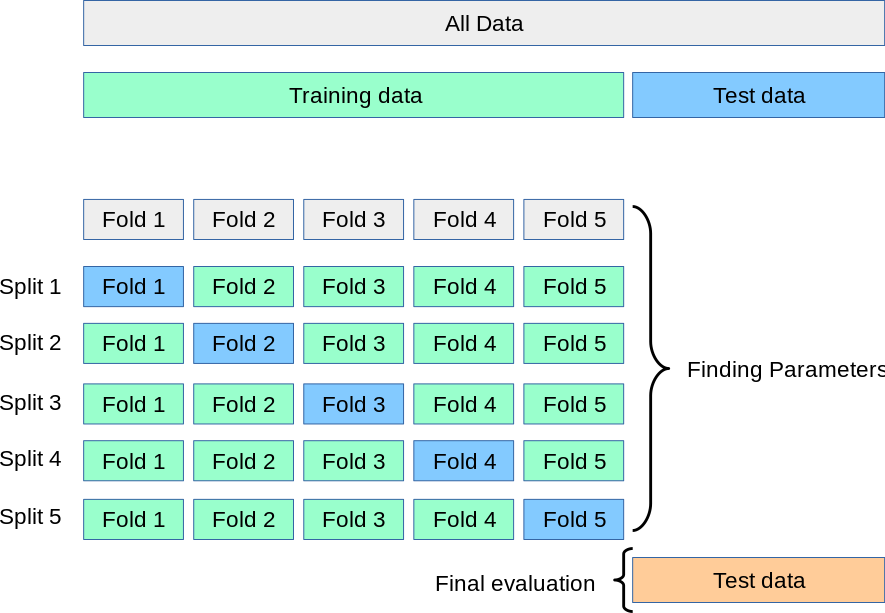

https://scikit-learn.org/stable/modules/cross_validation.html

In [ ]:
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html



$\mathrm{MSE}=\frac{1}{N}\sum_{i=1}^n(y_i-\hat{y}_i)^2$

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)
print("Dims of train ", X_train.shape, y_train.shape)
print("Dims of test ", X_test.shape, y_test.shape)

Dims of train  (11900, 8) (11900,)
Dims of test  (5100, 8) (5100,)


In [ ]:
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
# fit model step 1

lin_reg = LinearRegression().fit(X_train, y_train)

print("R^2 on train set {}".format(lin_reg.score(X_train, y_train)))
print("R^2 on test set {}".format(lin_reg.score(X_test, y_test)))

print("MSE on train set {}".format(
    mean_squared_error(y_train, lin_reg.predict(X_train))
    )
)
print("MSE on test set {}".format(
    mean_squared_error(y_test, lin_reg.predict(X_test))
    )
)

R^2 on train set 0.6375851309751237
R^2 on test set 0.6492538345819212
MSE on train set 4803.095967423598
MSE on test set 4880.3979596385025


In [ ]:
lin_reg.coef_, lin_reg.intercept_

(array([-4.29214290e+01, -4.24176134e+01,  1.16110862e+00, -8.98362849e-03,
         1.15185032e-01, -3.66694219e-02,  4.69730379e-02,  4.03237644e+01]),
 -3612.7404586294624)

In [ ]:
# resampling k-fold cross validation
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html#sklearn.model_selection.cross_val_score


# fit model step 2

lin_reg_2 = LinearRegression()

scores = cross_val_score(lin_reg_2, X, y, cv=5)
scores

array([0.52201778, 0.56428342, 0.60260364, 0.39679821, 0.65576199])

In [ ]:
print("%0.2f R^2 with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.55 R^2 with a standard deviation of 0.09


In [ ]:
lin_reg_2 = LinearRegression()
scores = cross_val_score(lin_reg_2, X, y, cv=5, scoring='neg_mean_squared_error')
print("%0.2f MSE with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

-5352.33 MSE with a standard deviation of 1329.57


###Регуляризация в задаче линейной регрессии

Пусть $X$ данные в матричной форме:

$$\bf{X}=\left[ \begin{matrix} 1 & X_{11} & X_{12} & ... & X_{1k}\\ 1& X_{21} & X_{22} & ... & X_{2k} \\ ... & ... & ... & ... & ... \\ 1 & X_{n1} & X_{n2} & ... & X_{nk} \end{matrix} \right]$$

$Y$, $\beta$, $\epsilon$ зависимая переменная, коэффициенты модели и вектор ошибок соответсвенно:

$$\bf{Y}=\left[ \begin{matrix} y_1 \\ y_2 \\ ... \\ y_n \end{matrix} \right], \bf{\beta}=\left[ \begin{matrix} \beta_0 \\ \beta_1 \\ ... \\ \beta_k \end{matrix} \right], \bf{\epsilon}=\left[ \begin{matrix} \epsilon_1 \\ \epsilon_2 \\ ... \\ \epsilon_n \end{matrix} \right]$$

Тогда модель линейной регрессии в общем виде:

$$Y = \bf{X \beta + \epsilon}$$

Пусть $\hat{y}=f(X)=X\hat{\beta}$ - оценка параметров $\beta$ для линейной модели.

Зафиксируем целевую функцию (objective function):

$$\mathrm{RSS}(\beta)=\sum_{i=1}^n(y_i - f(X_i))^2=(y-X\beta)^T(y-X\beta)$$

Тогда $\hat{\beta}^{\mathrm{OLS}}=\mathrm{argmin}_\beta\{\sum_{i=1}^n(y_i - f(X_i))^2\}$ оценка параметров линейной модели методом наименьших квадратов.

$$\hat{\beta}^{\mathrm{OLS}}=(X^TX)^{-1}X^Ty$$ - решение в общем виде для оценки методом наименьших кварратов.

### Ridge регуляризация

Пусть $\mathrm{RSS}(\beta)=\sum_{i=1}^n(y_i - f(X_i))^2+\lambda\sum_{i=1}^k\beta_j^2=(y-X\beta)^T(y-X\beta)+\lambda\beta^T\beta$ - целевая функция с параметром регуляризации $\lambda\beta^T\beta$, тогда

$\hat{\beta}^{\mathrm{ridge}}=\mathrm{argmin}_\beta\{\sum_{i=1}^n(y_i - f(X_i))^2+\lambda\sum_{i=1}^k\beta_j^2\}$ оценка параметров линейной модели c $L_2$ регуляризацией.

$$\hat{\beta}^{\mathrm{ridge}}=(X^TX+\lambda I)^{-1}X^Ty$$ - решение в общем виде для оценки c $L_2$ регуляризацией.

### LASSO регуляризация

Пусть $\mathrm{RSS}(\beta)=\sum_{i=1}^n(y_i - f(X_i))^2+\lambda\sum_{i=1}^k|\beta_j|=(y-X\beta)^T(y-X\beta)+\lambda||\beta||_1$ - целевая функция с парамтером регуляризации $\lambda||\beta||_1$, тогда

$\hat{\beta}^{\mathrm{lasso}}=\mathrm{argmin}_\beta\{\frac{1}{2}\sum_{i=1}^n(y_i - f(X_i))^2+\lambda\sum_{i=1}^k|\beta_j|\}$ оценка параметров линейной модели c $L_1$ регуляризацией.

Ддя $\hat{\beta}^{\mathrm{lasso}}$ не существут решения в общем виде, однако, оптимальная оценка может быть найдена методами оптимизации квадратичных функций.

In [ ]:
#https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html

# fit model Ridge

ridge_reg_1 = Ridge(alpha=1.0, solver='cholesky')
scores = cross_val_score(ridge_reg_1, X, y, cv=5, scoring='r2')
print("%0.2f R^2 with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

ridge_reg_2 = Ridge(alpha=1.0, solver='cholesky')
scores = cross_val_score(ridge_reg_2, X, y, cv=5, scoring='neg_mean_squared_error')
print("%0.2f MSE with a standard deviation of %0.2f" % (scores.mean(), scores.std()))
print("\n")

print("--------------- RIDGE coeffs alpha=1.0")
ridge_reg_3 = Ridge(alpha=1.0, solver='cholesky').fit(X_train,y_train)
print(ridge_reg_3.coef_, ridge_reg_3.intercept_, "\n")


print("--------------- RIDGE coeffs alpha=10.0")
ridge_reg_4 = Ridge(alpha=10.0, solver='cholesky').fit(X_train,y_train)
print(ridge_reg_4.coef_, ridge_reg_4.intercept_, "\n")

print("--------------- RIDGE coeffs alpha=100.0")
ridge_reg_5 = Ridge(alpha=100.0, solver='cholesky').fit(X_train,y_train)
print(ridge_reg_5.coef_, ridge_reg_5.intercept_, "\n")

print("--------------- OLS coeffs")
print(lin_reg.coef_, lin_reg.intercept_)

0.55 R^2 with a standard deviation of 0.09
-5352.03 MSE with a standard deviation of 1329.88


--------------- RIDGE coeffs alpha=1.0
[-4.29074407e+01 -4.24045336e+01  1.16133727e+00 -8.98484030e-03
  1.15166492e-01 -3.66696731e-02  4.70033197e-02  4.03245856e+01] -3611.5452675178294 

--------------- RIDGE coeffs alpha=10.0
[-4.27819790e+01 -4.22872240e+01  1.16338783e+00 -8.99564254e-03
  1.14999813e-01 -3.66719551e-02  4.72750721e-02  4.03319039e+01] -3600.825268345685 

--------------- RIDGE coeffs alpha=100.0
[-4.15688113e+01 -4.11531876e+01  1.18319623e+00 -9.09373770e-03
  1.13350796e-01 -3.66968047e-02  4.99175259e-02  4.03981251e+01] -3497.137932761225 

--------------- OLS coeffs
[-4.29214290e+01 -4.24176134e+01  1.16110862e+00 -8.98362849e-03
  1.15185032e-01 -3.66694219e-02  4.69730379e-02  4.03237644e+01] -3612.7404586294624


In [ ]:
#https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html

# fit model Lasso

lasso_reg_1 = Lasso(alpha=1.0)
scores = cross_val_score(lasso_reg_1, X, y, cv=5, scoring='r2')
print("%0.2f R^2 with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

lasso_reg_2 = Lasso(alpha=1.0)
scores = cross_val_score(lasso_reg_2, X, y, cv=5, scoring='neg_mean_squared_error')
print("%0.2f MSE with a standard deviation of %0.2f" % (scores.mean(), scores.std()))
print("\n")

print("--------------- LASSO coeffs alpha=1.0")
lasso_reg_3 = Lasso(alpha=1.0).fit(X_train,y_train)
print(lasso_reg_3.coef_, lasso_reg_3.intercept_, "\n")

print("--------------- LASSO coeffs alpha=10.0")
lasso_reg_4 = Lasso(alpha=10.0).fit(X_train,y_train)
print(lasso_reg_4.coef_, lasso_reg_4.intercept_, "\n")

print("--------------- LASSO coeffs alpha=100.0")
lasso_reg_5 = Lasso(alpha=100.0).fit(X_train,y_train)
print(lasso_reg_5.coef_, lasso_reg_5.intercept_, "\n")

print("--------------- OLS coeffs")
print(lin_reg.coef_, lin_reg.intercept_)

0.56 R^2 with a standard deviation of 0.07
-5318.24 MSE with a standard deviation of 1427.98


--------------- LASSO coeffs alpha=1.0
[-3.90786668e+01 -3.88232746e+01  1.21680467e+00 -9.28340186e-03
  1.09766158e-01 -3.67483260e-02  5.54222354e-02  4.05165803e+01] -3284.0806183661234 

--------------- LASSO coeffs alpha=10.0
[-4.49374412e+00 -6.47412275e+00  1.71806994e+00 -1.19820710e-02
  6.10033331e-02 -3.74577344e-02  1.31459141e-01  4.22521234e+01] -326.13902350915623 

--------------- LASSO coeffs alpha=100.0
[-0.         -0.          1.00948049  0.03475236 -0.21063508 -0.05565397
  0.22692586  6.0528728 ] 142.71153243167387 

--------------- OLS coeffs
[-4.29214290e+01 -4.24176134e+01  1.16110862e+00 -8.98362849e-03
  1.15185032e-01 -3.66694219e-02  4.69730379e-02  4.03237644e+01] -3612.7404586294624


## Конструирование признаков (Feature engineering)

### Rescale

In [ ]:
#https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MaxAbsScaler.html
abs_norm = MaxAbsScaler().fit(X)
X_normalized = abs_norm.transform(X)
X_normalized

array([[-0.91926015,  0.81501788,  0.28846154, ...,  0.02844571,
         0.07760605,  0.09957267],
       [-0.92054684,  0.82002384,  0.36538462, ...,  0.0316406 ,
         0.07612627,  0.12133252],
       [-0.92127061,  0.80309893,  0.32692308, ...,  0.00933244,
         0.01923709,  0.11005927],
       ...,
       [-0.99959791,  0.99737783,  0.32692308, ...,  0.03486352,
         0.07497534,  0.20208532],
       [-0.99959791,  0.99642431,  0.36538462, ...,  0.03637688,
         0.07859257,  0.13197912],
       [-1.        ,  0.96638856,  1.        , ...,  0.02258842,
         0.04439329,  0.20097866]])

In [ ]:
lin_reg_3 = LinearRegression()

scores = cross_val_score(lin_reg_3, X_normalized, y, cv=5, scoring='r2')
print("%0.2f R^2 with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

scores = cross_val_score(lin_reg_3, X_normalized, y, cv=5, scoring='neg_mean_squared_error')
print("%0.2f MSE with a standard deviation of %0.2f" % (scores.mean(), scores.std()))



0.55 R^2 with a standard deviation of 0.09
-5352.33 MSE with a standard deviation of 1329.57


### Nonlinearity

In [ ]:
dataset_1.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,-119.562108,35.625225,28.589353,2643.664412,539.410824,1429.573941,501.221941,3.883578,207.300912
std,2.005166,2.137340,12.586937,2179.947071,421.499452,1147.852959,384.520841,1.908157,115.983764
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14.999000
25%,-121.790000,33.930000,18.000000,1462.000000,297.000000,790.000000,282.000000,2.566375,119.400000
50%,-118.490000,34.250000,29.000000,2127.000000,434.000000,1167.000000,409.000000,3.544600,180.400000
75%,-118.000000,37.720000,37.000000,3151.250000,648.250000,1721.000000,605.250000,4.767000,265.000000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500.001000


In [ ]:
dataset_1['total_rooms'] = np.log(dataset_1['total_rooms'])
dataset_1['total_bedrooms'] = np.log(dataset_1['total_bedrooms'])
dataset_1['population'] = np.log(dataset_1['population'])
dataset_1['households'] = np.log(dataset_1['households'])
dataset_1.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,-119.562108,35.625225,28.589353,7.634250,6.055277,7.027439,5.984960,3.883578,207.300912
std,2.005166,2.137340,12.586937,0.742704,0.726624,0.732922,0.727605,1.908157,115.983764
min,-124.350000,32.540000,1.000000,0.693147,0.000000,1.098612,0.000000,0.499900,14.999000
25%,-121.790000,33.930000,18.000000,7.287561,5.693732,6.672033,5.641907,2.566375,119.400000
50%,-118.490000,34.250000,29.000000,7.662468,6.073045,7.062192,6.013715,3.544600,180.400000
75%,-118.000000,37.720000,37.000000,8.055554,6.474276,7.450661,6.405641,4.767000,265.000000
max,-114.310000,41.950000,52.000000,10.543682,8.771060,10.482402,8.713089,15.000100,500.001000


In [ ]:
X_log = dataset_1.loc[:, dataset_1.columns != 'median_house_value'].to_numpy()
X_log

array([[-114.31      ,   34.19      ,   15.        , ...,    6.92264389,
           6.15697899,    1.4936    ],
       [-114.47      ,   34.4       ,   19.        , ...,    7.02908756,
           6.13772705,    1.82      ],
       [-114.56      ,   33.69      ,   17.        , ...,    5.80814249,
           4.76217393,    1.6509    ],
       ...,
       [-124.3       ,   41.84      ,   17.        , ...,    7.12608727,
           6.12249281,    3.0313    ],
       [-124.3       ,   41.8       ,   19.        , ...,    7.1685799 ,
           6.16961073,    1.9797    ],
       [-124.35      ,   40.54      ,   52.        , ...,    6.69208374,
           5.59842196,    3.0147    ]])

In [ ]:
lin_reg_3 = LinearRegression()

scores = cross_val_score(lin_reg_3, X_log, y, cv=5, scoring='r2')
print("%0.2f R^2 with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

scores = cross_val_score(lin_reg_3, X_log, y, cv=5, scoring='neg_mean_squared_error')
print("%0.2f MSE with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.59 R^2 with a standard deviation of 0.08
-4880.92 MSE with a standard deviation of 1192.24


# Задача регрессии (простая нейронная сеть)

In [ ]:
dataset_1 = pd.read_csv("california_housing_train.csv")
X = dataset_1.loc[:, dataset_1.columns != 'median_house_value'].to_numpy()
y = dataset_1['median_house_value'].to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)
print("Dims of train ", X_train.shape, y_train.shape)
print("Dims of test ", X_test.shape, y_test.shape)

Dims of train  (11900, 8) (11900,)
Dims of test  (5100, 8) (5100,)


In [ ]:
# https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense
# https://keras.io/guides/functional_api/


input = keras.Input(shape=(8,))
x = layers.Dense(64, activation='relu')(input)
x = layers.Dense(64, activation='relu')(x)
output = layers.Dense(1)(x)

nn_1 = keras.Model(input, output)
nn_1.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 8)]               0         
                                                                 
 dense (Dense)               (None, 64)                576       
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4,801
Trainable params: 4,801
Non-trainable params: 0
_________________________________________________________________


In [ ]:
LR = 0.001
nn_1.compile(
    optimizer=keras.optimizers.Adam(learning_rate=LR),
    loss=[tf.keras.losses.MeanAbsoluteError()],
    metrics=[tf.keras.metrics.MeanSquaredError()]
)

print("Fit model on training data")
history = nn_1.fit(
    X_train,
    y_train,
    epochs=30,
    validation_data=(X_test, y_test))

Fit model on training data
Epoch 1/30
372/372 [==============================] - 5s 5ms/step - loss: 139482.4844 - mean_squared_error: 33668884480.0000 - val_loss: 116905.9531 - val_mean_squared_error: 27397017600.0000
Epoch 2/30
372/372 [==============================] - 2s 4ms/step - loss: 111370.8438 - mean_squared_error: 24605741056.0000 - val_loss: 108485.2969 - val_mean_squared_error: 24429299712.0000
Epoch 3/30
372/372 [==============================] - 3s 7ms/step - loss: 99567.7891 - mean_squared_error: 19507484672.0000 - val_loss: 94041.8203 - val_mean_squared_error: 17196939264.0000
Epoch 4/30
372/372 [==============================] - 3s 8ms/step - loss: 86368.7422 - mean_squared_error: 13820747776.0000 - val_loss: 84807.7422 - val_mean_squared_error: 12693773312.0000
Epoch 5/30
372/372 [==============================] - 3s 8ms/step - loss: 81420.1562 - mean_squared_error: 11497886720.0000 - val_loss: 82982.4219 - val_mean_squared_error: 11738802176.0000
Epoch 6/30
372/372 

dict_keys(['loss', 'mean_squared_error', 'val_loss', 'val_mean_squared_error'])


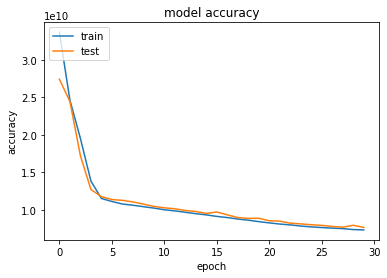

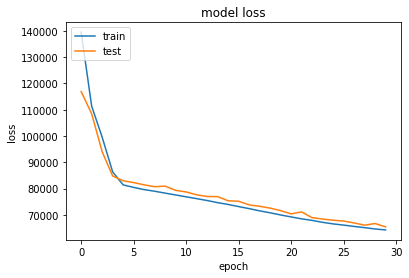

In [ ]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['mean_squared_error'])
plt.plot(history.history['val_mean_squared_error'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
X_train_norm, X_test_norm, y_train_norm, y_test_norm = train_test_split(X_normalized, y, test_size=0.3, random_state=2)

input = keras.Input(shape=(8,))
x = layers.Dense(64, activation='relu')(input)
x = layers.Dense(64, activation='relu')(x)
output = layers.Dense(1)(x)

nn_1 = keras.Model(input, output)
#nn_1.summary()

LR = 0.001
nn_1.compile(
    optimizer=keras.optimizers.Adam(learning_rate=LR),
    loss=[tf.keras.losses.MeanAbsoluteError()],
    metrics=[tf.keras.metrics.MeanSquaredError()]

)

print("Fit model on training data")
history = nn_1.fit(
    X_train_norm,
    y_train_norm,
    epochs=30,
    validation_data=(X_test_norm, y_test_norm))

Fit model on training data
Epoch 1/30
372/372 [==============================] - 2s 5ms/step - loss: 206795.4688 - mean_squared_error: 56014397440.0000 - val_loss: 205778.3906 - val_mean_squared_error: 56247169024.0000
Epoch 2/30
372/372 [==============================] - 2s 4ms/step - loss: 200349.9219 - mean_squared_error: 53364846592.0000 - val_loss: 192691.4375 - val_mean_squared_error: 50942058496.0000
Epoch 3/30
372/372 [==============================] - 2s 4ms/step - loss: 177556.3281 - mean_squared_error: 44675104768.0000 - val_loss: 159030.9219 - val_mean_squared_error: 38844985344.0000
Epoch 4/30
372/372 [==============================] - 2s 4ms/step - loss: 135406.7656 - mean_squared_error: 30624692224.0000 - val_loss: 114283.0156 - val_mean_squared_error: 24465571840.0000
Epoch 5/30
372/372 [==============================] - 2s 7ms/step - loss: 99154.9609 - mean_squared_error: 18977902592.0000 - val_loss: 91153.8203 - val_mean_squared_error: 16145519616.0000
Epoch 6/30
372/

dict_keys(['loss', 'mean_squared_error', 'val_loss', 'val_mean_squared_error'])


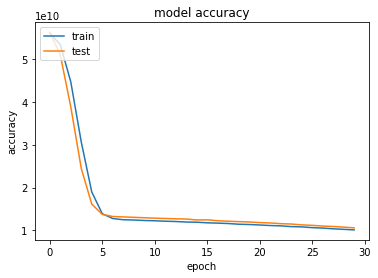

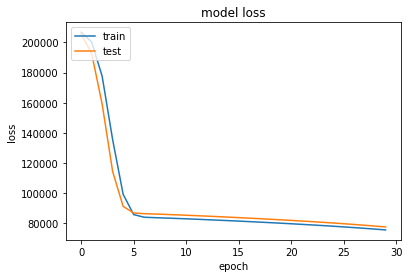

In [ ]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['mean_squared_error'])
plt.plot(history.history['val_mean_squared_error'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
# https://www.tensorflow.org/api_docs/python/tf/keras/layers/Normalization

input = keras.Input(shape=(8,))
x = layers.Normalization()(input)
x = layers.Dense(64, activation='relu')(x)
x = layers.Dense(64, activation='relu')(x)
output = layers.Dense(1)(x)

nn_2 = keras.Model(input, output)
nn_2.summary()


Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 8)]               0         
                                                                 
 normalization (Normalizatio  (None, 8)                17        
 n)                                                              
                                                                 
 dense_6 (Dense)             (None, 64)                576       
                                                                 
 dense_7 (Dense)             (None, 64)                4160      
                                                                 
 dense_8 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4,818
Trainable params: 4,801
Non-trainable params: 17
________________________________________________________

In [ ]:

LR = 0.001
nn_2.compile(
    optimizer=keras.optimizers.Adam(learning_rate=LR),
    loss=[tf.keras.losses.MeanAbsoluteError()],
    metrics=[tf.keras.metrics.MeanSquaredError()]

)

print("Fit model on training data")
history = nn_2.fit(
    X_train,
    y_train,
    epochs=30,
    validation_data=(X_test, y_test))

Fit model on training data
Epoch 1/30
372/372 [==============================] - 3s 5ms/step - loss: 144987.7812 - mean_squared_error: 35822739456.0000 - val_loss: 116765.2109 - val_mean_squared_error: 27681896448.0000
Epoch 2/30
372/372 [==============================] - 2s 5ms/step - loss: 112227.6172 - mean_squared_error: 24842373120.0000 - val_loss: 110188.4219 - val_mean_squared_error: 24272132096.0000
Epoch 3/30
372/372 [==============================] - 2s 4ms/step - loss: 102708.3047 - mean_squared_error: 20724606976.0000 - val_loss: 97876.5781 - val_mean_squared_error: 19019096064.0000
Epoch 4/30
372/372 [==============================] - 2s 4ms/step - loss: 88996.7344 - mean_squared_error: 14882031616.0000 - val_loss: 86128.2422 - val_mean_squared_error: 13466316800.0000
Epoch 5/30
372/372 [==============================] - 2s 4ms/step - loss: 81907.7969 - mean_squared_error: 11681053696.0000 - val_loss: 83248.2266 - val_mean_squared_error: 11745435648.0000
Epoch 6/30
372/372

dict_keys(['loss', 'mean_squared_error', 'val_loss', 'val_mean_squared_error'])


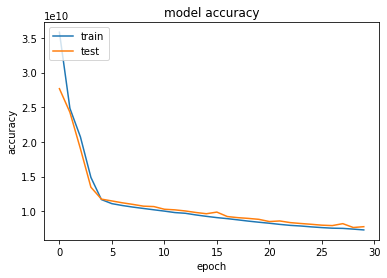

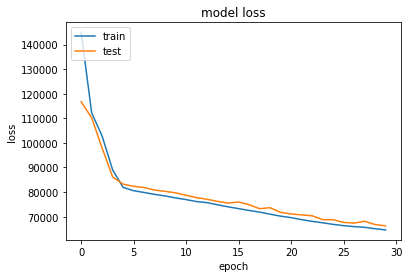

In [ ]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['mean_squared_error'])
plt.plot(history.history['val_mean_squared_error'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
dataset_1 = pd.read_csv("california_housing_train.csv")
dataset_1['median_house_value'] = dataset_1['median_house_value']/1000
dataset_1.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,-119.562108,35.625225,28.589353,2643.664412,539.410824,1429.573941,501.221941,3.883578,207.300912
std,2.005166,2.137340,12.586937,2179.947071,421.499452,1147.852959,384.520841,1.908157,115.983764
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14.999000
25%,-121.790000,33.930000,18.000000,1462.000000,297.000000,790.000000,282.000000,2.566375,119.400000
50%,-118.490000,34.250000,29.000000,2127.000000,434.000000,1167.000000,409.000000,3.544600,180.400000
75%,-118.000000,37.720000,37.000000,3151.250000,648.250000,1721.000000,605.250000,4.767000,265.000000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500.001000


In [ ]:
dataset_1["rooms_per_person"] = dataset_1["total_rooms"] / dataset_1["population"]
dataset_1["rooms_on_income"] = dataset_1["median_income"]*dataset_1["total_rooms"]
dataset_1.corr()['median_house_value']

longitude            -0.044982
latitude             -0.144917
housing_median_age    0.106758
total_rooms           0.130991
total_bedrooms        0.045783
population           -0.027850
households            0.061031
median_income         0.691871
median_house_value    1.000000
rooms_per_person      0.206969
rooms_on_income       0.375019
Name: median_house_value, dtype: float64

In [ ]:
#dataset_2 = dataset_1.drop(columns=["longitude", "total_bedrooms", "population", "households"])
X = dataset_1.loc[:, dataset_1.columns != 'median_house_value'].to_numpy()
y = dataset_1['median_house_value'].to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)
print("Dims of train ", X_train.shape, y_train.shape)
print("Dims of test ", X_test.shape, y_test.shape)

Dims of train  (11900, 10) (11900,)
Dims of test  (5100, 10) (5100,)


In [ ]:
input = keras.Input(shape=(10,))
x = layers.Normalization()(input)
x = layers.Dense(64, activation='relu')(x)
x = layers.Dense(64, activation='relu')(x)
output = layers.Dense(1)(x)

nn_2 = keras.Model(input, output)

LR = 0.001
nn_2.compile(
    optimizer=keras.optimizers.Adam(learning_rate=LR),
    loss=[tf.keras.losses.MeanAbsoluteError()],
    metrics=[tf.keras.metrics.MeanSquaredError()]

)

print("Fit model on training data")
history = nn_2.fit(
    X_train,
    y_train,
    epochs=30,
    validation_data=(X_test, y_test))

Fit model on training data
Epoch 1/30
372/372 [==============================] - 2s 5ms/step - loss: 123.5778 - mean_squared_error: 84509.2656 - val_loss: 94.7028 - val_mean_squared_error: 28951.8555
Epoch 2/30
372/372 [==============================] - 2s 4ms/step - loss: 74.1135 - mean_squared_error: 13103.9932 - val_loss: 84.0273 - val_mean_squared_error: 13924.6475
Epoch 3/30
372/372 [==============================] - 2s 4ms/step - loss: 69.8124 - mean_squared_error: 11254.4961 - val_loss: 62.4042 - val_mean_squared_error: 8254.2021
Epoch 4/30
372/372 [==============================] - 2s 4ms/step - loss: 63.7925 - mean_squared_error: 8883.7812 - val_loss: 65.3682 - val_mean_squared_error: 11510.4131
Epoch 5/30
372/372 [==============================] - 2s 4ms/step - loss: 64.2597 - mean_squared_error: 9500.2275 - val_loss: 57.6894 - val_mean_squared_error: 7735.1694
Epoch 6/30
372/372 [==============================] - 2s 5ms/step - loss: 60.9381 - mean_squared_error: 7677.7090 - 